In [179]:
# import required libraries
import numpy as np
import pandas as pd
import plotly
import plotly.graph_objects as go
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [180]:
# load and read dataset
dataset = pd.read_csv('HR_comma_sep.csv')
dataset.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [181]:
# find null values
dataset.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [182]:
# rename column as there is a spelling mistake
dataset = dataset.rename(columns = {'average_montly_hours':'average_monthly_hours'})

In [183]:
# rename further columns where few errors related to capitalization are encountered
dataset = dataset.rename(columns = {'Work_accident': 'work_accident', 'Department': 'department'})

In [184]:
# now show all column names
dataset.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [185]:
# find unique values in department
dataset.department.value_counts()

department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

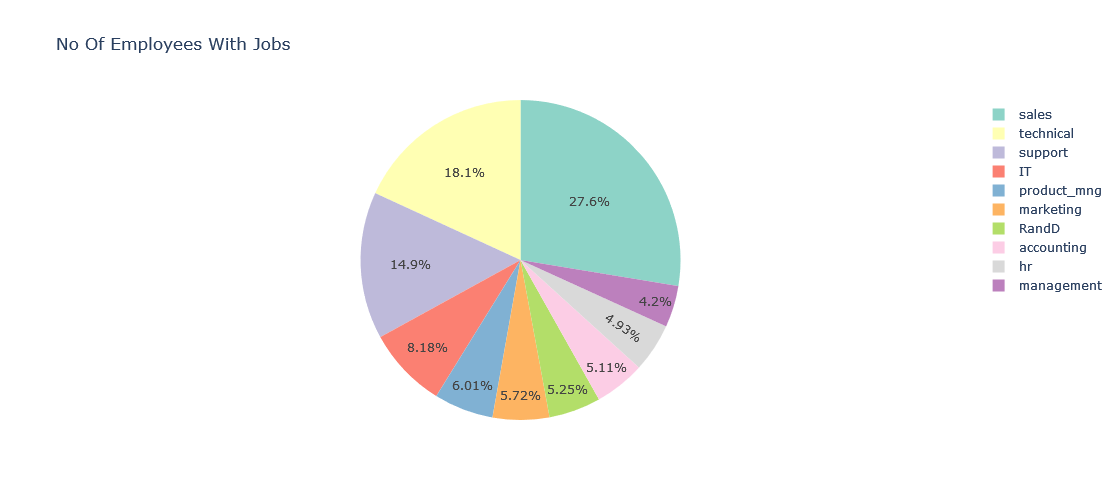

In [186]:
# find out how many employees work in different departments using pie chart
labels = dataset.department.value_counts().index
values = dataset.department.value_counts().values

fig = go.Figure()

fig.add_trace(go.Pie(labels = labels, values = values, marker = dict(colors = plotly.colors.qualitative.Set3)))
fig.update_layout(title = 'No Of Employees With Jobs', height = 500)
fig.show()

In [187]:
# unique values in salary column
dataset['salary'].value_counts()

salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64

In [188]:
# salary
labels = dataset.salary.value_counts().index
values = dataset.salary.value_counts().values
print(labels)
print(values)

Index(['low', 'medium', 'high'], dtype='object', name='salary')
[7316 6446 1237]


In [189]:
# left or not 
labels1 = dataset.left.value_counts().index
values1 = dataset.left.value_counts().values
print(labels1)
print(values1)

Index([0, 1], dtype='int64', name='left')
[11428  3571]


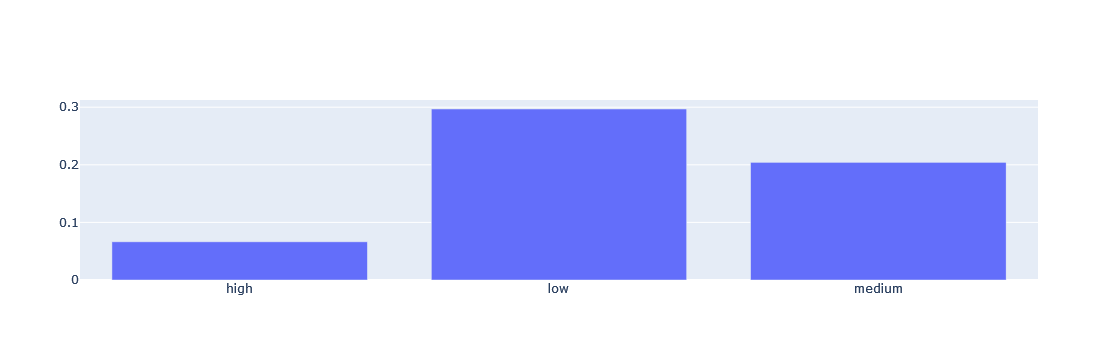

In [197]:
# group both data and then plot a bar graph
group_data = dataset.groupby('salary')['left'].mean()

labels2 = group_data.index
values2 = group_data.values


fig = go.Figure()

fig.add_trace(go.Bar(x = labels2, y = values2))
fig.show()

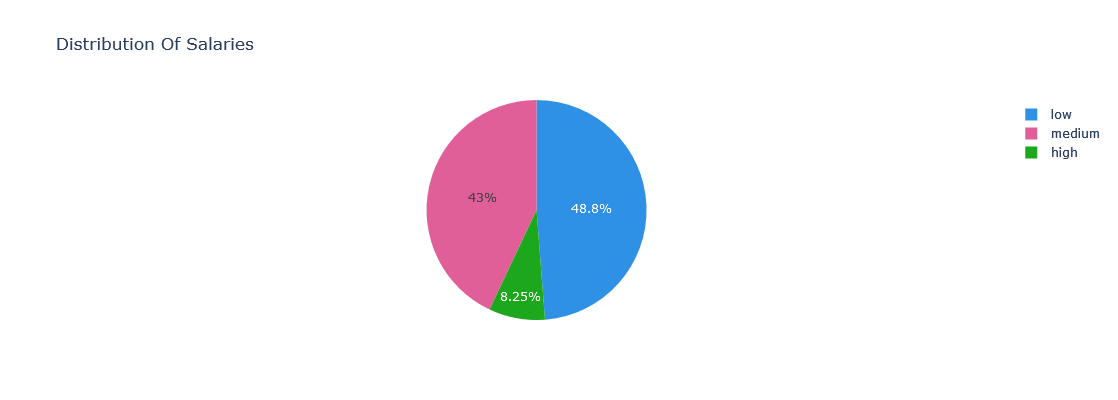

In [82]:
# now plot a pie graph to show distribution of salary categories

fig = go.Figure()

fig.add_trace(go.Pie(labels = labels, values = values, marker = dict(colors = plotly.colors.qualitative.Dark24)))
fig.update_layout(title = 'Distribution Of Salaries', height = 400)
fig.show()

In [83]:
# get dummies for department table
dept_dummies = pd.get_dummies(dataset['department'], dtype = int)
dept_dummies.head()

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0


In [84]:
dataset.salary

0           low
1        medium
2        medium
3           low
4           low
          ...  
14994       low
14995       low
14996       low
14997       low
14998       low
Name: salary, Length: 14999, dtype: object

In [85]:
# use sklearn's onehotencoder for one hot encoding on column salary
encoder = OneHotEncoder()
data = dataset['salary'].to_numpy().reshape(-1, 1)

salary_dummies = encoder.fit_transform(data)
feature_names = encoder.get_feature_names_out(input_features=['salary'])
salary_dummies = salary_dummies.toarray()

salary_dummy = pd.DataFrame(salary_dummies, columns = feature_names)
salary_dummy

,salary_high,salary_low,salary_medium
0,0.0,1.0,0.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
14994,0.0,1.0,0.0
14995,0.0,1.0,0.0
14996,0.0,1.0,0.0
14997,0.0,1.0,0.0


In [86]:
# now concat data and their dummies into a final dataset
final_dataset = pd.concat([dataset, dept_dummies, salary_dummy], axis = 1)
final_dataset.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary,...,hr,management,marketing,product_mng,sales,support,technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,0,0,0,0,1,0,0,0.0,1.0,0.0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,0,0,0,0,1,0,0,0.0,0.0,1.0
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,0,0,0,0,1,0,0,0.0,0.0,1.0
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,0,0,0,0,1,0,0,0.0,1.0,0.0
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,0,0,0,0,1,0,0,0.0,1.0,0.0


In [89]:
# here we have dropped just the department and salary columns
final_dataset1 = final_dataset.drop(['department', 'salary'], axis = 1)
final_dataset1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,IT,RandD,...,hr,management,marketing,product_mng,sales,support,technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0.0,1.0,0.0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0.0,0.0,1.0
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0.0,0.0,1.0
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0.0,1.0,0.0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0.0,1.0,0.0


In [105]:
# now in final_dataset2 i am dropping another two columns from the newly created dummies as to avoid any multicolinearity
final_dataset2 = final_dataset1.drop(['hr', 'salary_low'], axis = 1)
final_dataset2.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,IT,RandD,accounting,management,marketing,product_mng,sales,support,technical,salary_high,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,0.0,0.0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0.0,1.0
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0.0,1.0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,0.0,0.0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,0.0,0.0


In [100]:
final_dataset1.columns.difference(final_dataset2.columns)

Index(['hr', 'salary_low'], dtype='object')

In [106]:
final_dataset = final_dataset2
final_dataset.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,IT,RandD,accounting,management,marketing,product_mng,sales,support,technical,salary_high,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,0.0,0.0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0.0,1.0
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0.0,1.0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,0.0,0.0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,0.0,0.0


In [108]:
# now pop left column and then add it to the end
popped_column = final_dataset.pop('left')

# add the column to end
final_dataset['left'] = popped_column
final_dataset.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,IT,RandD,accounting,management,marketing,product_mng,sales,support,technical,salary_high,salary_medium,left
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,1,0,0,0.0,0.0,1
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,1,0,0,0.0,1.0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,1,0,0,0.0,1.0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,1,0,0,0.0,0.0,1
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,1,0,0,0.0,0.0,1


In [110]:
# count columns
len(final_dataset.columns)

19

In [111]:
# now find correlation of each column with respect to left column
final_dataset.corr()['left']

satisfaction_level      -0.388375
last_evaluation          0.006567
number_project           0.023787
average_monthly_hours    0.071287
time_spend_company       0.144822
work_accident           -0.154622
promotion_last_5years   -0.061788
IT                      -0.010925
RandD                   -0.046596
accounting               0.015201
management              -0.046035
marketing               -0.000859
product_mng             -0.011029
sales                    0.009923
support                  0.010700
technical                0.020076
salary_high             -0.120929
salary_medium           -0.068833
left                     1.000000
Name: left, dtype: float64

In [112]:
# describe the data
final_dataset.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,IT,RandD,accounting,management,marketing,product_mng,sales,support,technical,salary_high,salary_medium,left
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,0.081805,0.052470,0.051137,0.042003,0.057204,0.060137,0.276018,0.148610,0.181345,0.082472,0.429762,0.238083
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.274077,0.222981,0.220284,0.200602,0.232239,0.237749,0.447041,0.355715,0.385317,0.275092,0.495059,0.425924
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [113]:
# now split dataset into training and testing
x = final_dataset.iloc[ : , : -1]
y = final_dataset.iloc[ : , -1]

In [129]:
x.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,IT,RandD,accounting,management,marketing,product_mng,sales,support,technical,salary_high,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,1,0,0,0.0,0.0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,1,0,0,0.0,1.0
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,1,0,0,0.0,1.0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,1,0,0,0.0,0.0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,1,0,0,0.0,0.0


In [165]:
# scale x values
scaler = StandardScaler()

x = scaler.fit_transform(x)

In [166]:
# split data into training and testing
test_size = len(final_dataset) * 0.2
print(len(final_dataset))
print(round(test_size))
print(len(final_dataset) - round(test_size))

14999
3000
11999


In [168]:
# training and testing for x
x_train = x[: 11999, : ]
x_test = x[11999 : , : ]

In [169]:
# training and testing for y
y_train = y.iloc[ : 11999]
y_test = y.iloc[11999: ]

In [170]:
# print lengths of all trainings and testings
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

11999
11999
3000
3000


In [171]:
# now build model
model = LogisticRegression()

# fit model
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [172]:
# y_pred
y_pred = y_pred.reshape(-1, 1)

In [173]:
# y_test
y_test = np.array(y_test).reshape(-1, 1)

In [174]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]], dtype=int64)

In [175]:
accuracy_score(y_test, y_pred)

0.557